In [1]:
import pandas as pd

Loading Data

In [2]:
df = pd.read_csv("mobilepricedata.csv")

In [3]:
# data information
df.head(3)

,Name,Brand_Name,Processor,BrandCategory,ProcessorCategory,Rating,Numbe_of_Ratings,Number_of_Reviews,RAM,ROM,Diplay_Size,Back_Camera,Front_Camera,Battery,Price,Price_Range
0,"Redmi Note 4 (Black, 64 GB)",Redmi,Snapdragon,10,5,4.4,1341712.0,211542.0,4,64,5.5,13.0,5.0,4100,12749,1
1,"Redmi Note 4 (Dark Grey, 64 GB)",Redmi,Snapdragon,10,5,4.4,1341712.0,211542.0,4,64,5.5,13.0,5.0,4100,12749,1
2,"Redmi Note 4 (Gold, 64 GB)",Redmi,Snapdragon,10,5,4.4,1341712.0,211542.0,4,64,5.5,13.0,5.0,4100,12749,1


Brand Categories are labbled as 
Brand Name: Apple Asus Google Infinix Xiaomi Motorola OnePlus
Number     : 0     1     2      3       4      5         6

In [4]:
df.BrandCategory.unique()

array([10,  9,  5,  4,  1,  3, 13,  8, 11,  0,  7, 12,  2,  6],
      dtype=int64)

In [5]:
df.Price_Range.unique()

array([1, 0, 2, 3, 4, 7, 8, 5, 6], dtype=int64)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               2190 non-null   object 
 1   Brand_Name         2190 non-null   object 
 2   Processor          2190 non-null   object 
 3   BrandCategory      2190 non-null   int64  
 4   ProcessorCategory  2190 non-null   int64  
 5   Rating             2190 non-null   float64
 6   Numbe_of_Ratings   2190 non-null   float64
 7   Number_of_Reviews  2190 non-null   float64
 8   RAM                2190 non-null   int64  
 9   ROM                2190 non-null   int64  
 10  Diplay_Size        2190 non-null   float64
 11  Back_Camera        2190 non-null   float64
 12  Front_Camera       2190 non-null   float64
 13  Battery            2190 non-null   int64  
 14  Price              2190 non-null   int64  
 15  Price_Range        2190 non-null   int64  
dtypes: float64(6), int64(7),

Dropping Features

In [7]:
y=df.Price_Range

In [8]:
x=df.drop(['Name','Brand_Name','Processor','Number_of_Reviews',"Price_Range","Price"],axis=1)

Splitting Data (Test , Train)

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(x_train.shape)
print(y_train.shape)

(1752, 10)
(1752,)


Fitting KNN Model

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

Checking Accuracy Score of KNN

In [48]:
y_pred_knn=knn.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_knn)

0.6164383561643836

Heat map and Confusion Matrix

<AxesSubplot:>

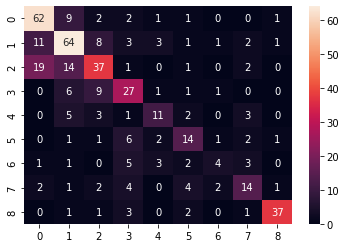

In [49]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_knn)
sns.heatmap(cm,annot=True,fmt='d')  # here annot = True means we want to display the values with fmt = 'd' means integer format

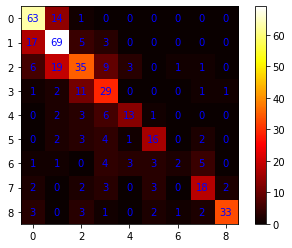

In [75]:
plt.imshow(cm, cmap='hot')

# Add a colorbar for reference
plt.colorbar()
# Add numbers as annotations
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, f'{cm[i, j]:d}', ha='center', va='center' ,color='blue')

# Set the axis labels
# Show the plot
plt.show()

Initializing PCA

In [50]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

In [51]:
pca.fit(x_train)
x_pca=pca.transform(x_train)
explained_variance=pca.explained_variance_ratio_
explained_variance

array([9.9995366e-01, 4.5447712e-05])

Cluster Figure using PCA

In [52]:
import matplotlib.pyplot as plt
from sklearn import (manifold, datasets)

<Figure size 576x432 with 0 Axes>

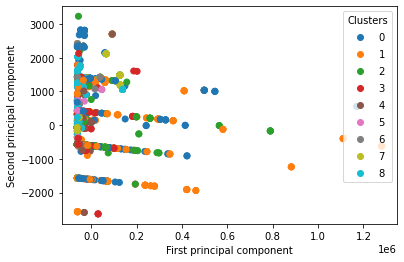

In [54]:
plt.figure(figsize=(8,6))
fig, ax = plt.subplots() # this create the ractangular box 

 # c=y_train : This parameter specifies the colors for the points in the scatter plot.
 #cmap='tab10': This parameter determines the colormap to be used for mapping the labels to colors.
#In this case, 'tab10' is the name of the colormap that provides a set of distinct colors suitable for categorical data.   
sc=plt.scatter(x_pca[:,0],x_pca[:,1],c=y_train,cmap='tab10') 
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
ax.legend(*sc.legend_elements(), title='Clusters')

Fitting KNN using PCA

In [56]:
knn.fit(x_pca,y_train)

KNeighborsClassifier(n_neighbors=3)

Checking Accuracy Score of KNN by using PCA

In [57]:
x_test_pca=pca.transform(x_test)
y_pred_pca=knn.predict(x_test_pca)

In [58]:
accuracy_score(y_test,y_pred_pca)

0.591324200913242

Heat map and Confusion Matrix using PCA

<AxesSubplot:>

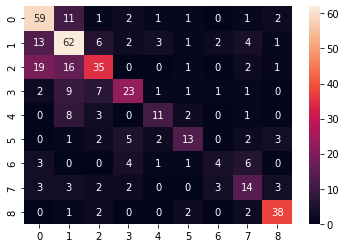

In [59]:
cm=confusion_matrix(y_test,y_pred_pca)
sns.heatmap(cm,annot=True,fmt='g')

Initializing LDA

In [60]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda= LinearDiscriminantAnalysis(n_components=2)
x_lda=lda.fit_transform(x_train,y_train)
x_test_lda=lda.transform(x_test)

Fitting KNN using LDA

In [61]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_lda,y_train)

KNeighborsClassifier(n_neighbors=3)

Checking Accuracy Score of KNN using LDA


In [62]:
y_pred_lda=knn.predict(x_test_lda)
accuracy_score(y_test,y_pred_lda)

0.634703196347032

Heat map and Confusion Matrix of KNN using LDA

<AxesSubplot:>

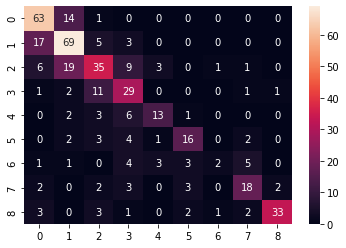

In [66]:
cm=confusion_matrix(y_test,y_pred_lda)
sns.heatmap(cm,annot=True,fmt='d')

# Distributions

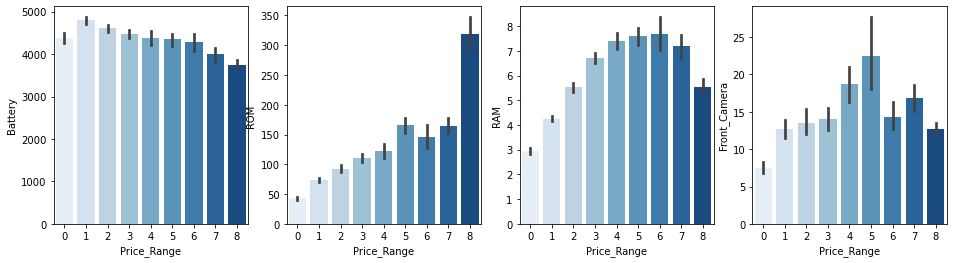

In [67]:
plt.figure(figsize = (16,4))
plt.subplot(1,4,1)
sns.barplot(x = 'Price_Range', y = 'Battery', data = df, palette = 'Blues')
plt.subplot(1,4,2)
sns.barplot(x = 'Price_Range', y = 'ROM',data = df, palette ='Blues')
plt.subplot(1,4,3)
sns.barplot(x = 'Price_Range', y = 'RAM',data = df, palette ='Blues')
plt.subplot(1,4,4)
sns.barplot(x = 'Price_Range', y = 'Front_Camera', data = df,palette = 'Blues')
plt.show()